In [1]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.float_format', '{:,.2f}'.format)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_pickle('D:\Projects\Cafe db\data')

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11144\2140274798.py:1: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_pickle('D:\Projects\Cafe db\data')


In [4]:
df.head()

,rnm,num_check,datetime,time_eat,smena,good,total_chek,price,pr_bez_nds,avg_price,profit,amount,position_good,summa,payment,check_unique,group,on-group,seasons,day,hour,date,revenue,mnth,quart
0,6916860058096,92970,2024-01-09 08:06:00,Ранний завтрак,240,Яичница с беконом,181.00,45.00,37.50,22.95,14.55,1.00,1,181.00,card,92970 - 6916860058096,Завтрак,Яичница,Зима,Вторник,8,2024-01-09,37.50,Январь,1 Квартал
1,6916860058096,92970,2024-01-09 08:06:00,Ранний завтрак,240,Сосиски отварные,181.00,65.00,54.17,23.78,30.39,1.00,2,181.00,card,92970 - 6916860058096,Основное блюдо,Колбаски разные,Зима,Вторник,8,2024-01-09,54.17,Январь,1 Квартал
2,6916860058096,92970,2024-01-09 08:06:00,Ранний завтрак,240,Каша овсяная на молоке,181.00,65.00,54.17,13.75,40.42,1.00,3,181.00,card,92970 - 6916860058096,Завтрак,Каши,Зима,Вторник,8,2024-01-09,54.17,Январь,1 Квартал
3,6916860058096,92970,2024-01-09 08:06:00,Ранний завтрак,240,Хлеб ржано-пшеничный,181.00,6.00,5.00,1.84,3.16,1.00,4,181.00,card,92970 - 6916860058096,Хлеб,Хлеб,Зима,Вторник,8,2024-01-09,5.00,Январь,1 Квартал
4,6916860058096,92971,2024-01-09 08:07:00,Ранний завтрак,240,Каша рисовая на молоке,145.00,65.00,54.17,17.42,36.75,1.00,1,145.00,card,92971 - 6916860058096,Завтрак,Каши,Зима,Вторник,8,2024-01-09,54.17,Январь,1 Квартал


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483044 entries, 0 to 483043
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   rnm            483044 non-null  int64         
 1   num_check      483044 non-null  int64         
 2   datetime       483044 non-null  datetime64[ns]
 3   time_eat       483044 non-null  object        
 4   smena          483044 non-null  int64         
 5   good           483044 non-null  object        
 6   total_chek     483044 non-null  float64       
 7   price          483044 non-null  float64       
 8   pr_bez_nds     483044 non-null  float64       
 9   avg_price      483044 non-null  float64       
 10  profit         483044 non-null  float64       
 11  amount         483044 non-null  float64       
 12  position_good  483044 non-null  int64         
 13  summa          483044 non-null  float64       
 14  payment        483044 non-null  object        
 15  

**Общие продажи**

In [6]:
revenue_by_seasons = df.groupby('seasons')['revenue'].sum().reset_index()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11144\1463252941.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_by_seasons = df.groupby('seasons')['revenue'].sum().reset_index()


In [7]:
revenue_by_seasons

,seasons,revenue
0,Весна,"10,856,403.81"
1,Зима,"6,261,071.99"
2,Лето,"9,891,405.76"
3,Осень,"8,002,904.17"


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11144\1410262580.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


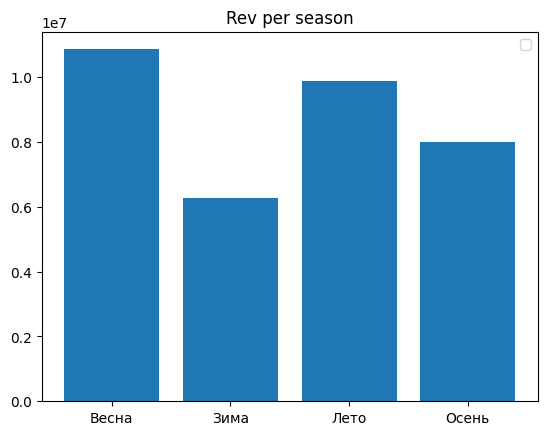

In [8]:
plt.bar(revenue_by_seasons['seasons'], revenue_by_seasons['revenue'])
plt.title('Rev per season')
plt.legend()

Text(0.5, 1.0, 'Rev per season')

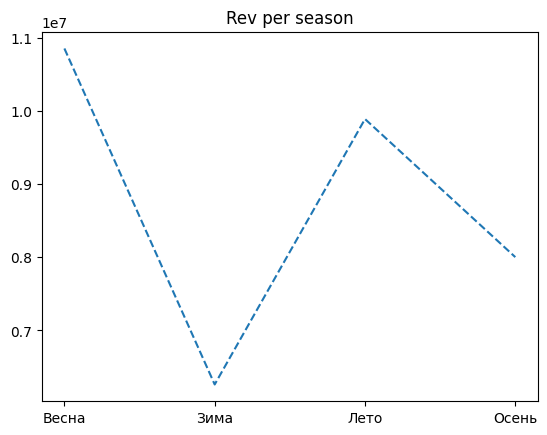

In [9]:
plt.plot(revenue_by_seasons['seasons'], revenue_by_seasons['revenue'], '--')
plt.title('Rev per season')

Text(0.5, 1.0, 'Rev per season')

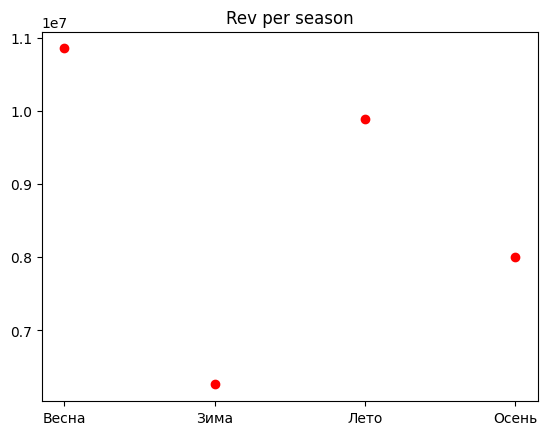

In [10]:
plt.plot(revenue_by_seasons['seasons'], revenue_by_seasons['revenue'], 'ro')
plt.title('Rev per season')

In [11]:
revenue_by_day = df.groupby('date')['revenue'].sum().reset_index()


In [12]:
revenue_by_day

,date,revenue
0,2024-01-09,"151,390.56"
1,2024-01-10,"152,921.11"
2,2024-01-11,"187,202.28"
3,2024-01-12,"159,033.73"
4,2024-01-15,"169,526.85"
...,...,...
201,2024-10-25,"176,409.45"
202,2024-10-28,"180,356.76"
203,2024-10-29,"175,909.67"
204,2024-10-30,"197,619.28"


In [20]:
revenue_by_group = df.groupby('group')['revenue'].sum().reset_index()

In [21]:
revenue_by_group.sort_values(by='revenue', ascending=False)

,group,revenue
9,Основное блюдо,"13,882,885.54"
12,Салат,"4,297,947.21"
15,Супы Горячие,"2,956,153.54"
3,Гарнир,"2,857,077.46"
8,Напитки,"2,584,406.21"
5,Завтрак,"1,586,977.91"
2,Выпечка и десерт,"1,480,207.64"
20,Хрень,"1,198,783.99"
1,Выпечка,"1,031,934.03"
0,Бутерброд,"878,893.98"


In [25]:
df['group'].unique()

array(['Завтрак', 'Основное блюдо', 'Хлеб', 'Напитки', 'Контейнер',
       'Выпечка и десерт', 'Бутерброд', 'Выпечка', 'Соус', 'Салат',
       'Снеки', 'Фрукты', 'Гарнир', 'Супы Горячие', 'Десерты', 'Приборы',
       'Торт цельный', 'Индивидуальный заказ', 'Хрень', 'Пирог цельный',
       'Супы холодные'], dtype=object)